# Module 5 AdaBoost classifier

In [1]:
import pandas as p
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, plot_confusion_matrix

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = p.read_csv('crop.csv')

In [4]:
df=data.dropna()

In [5]:
df.columns

Index(['nitrogen', 'phosphorus', 'potassium', 'temperature', 'humidity', 'ph',
       'rainfall', 'label'],
      dtype='object')

In [6]:
var_mod = ['label']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i]).astype(int)

In [7]:
inputs = df.drop(labels='label', axis=1)
output = df.loc[:,'label']

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs, output, test_size=0.3, random_state=1, stratify=output)
print("Number of Training Datasets: ", len(X_train))
print("Number of Testing Datasets: ", len(X_test))
print("Total Number of Datasets: ", len(X_train)+len(X_test))

Number of Training Datasets:  1540
Number of Testing Datasets:  660
Total Number of Datasets:  2200


In [9]:
#Model Training
cbc = AdaBoostClassifier()
cbc.fit(X_train,y_train)
predicted_cbc = cbc.predict(X_test)

In [10]:
#Getting Accuracy
accuracy = accuracy_score(y_test,predicted_cbc) # accuracy: (tp + tn) / (p + n)
print('Accuracy of Ada Boost Classifier is: ',accuracy*100)

Accuracy of Ada Boost Classifier is:  18.181818181818183


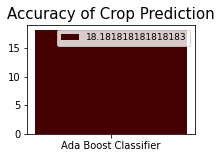

In [11]:
DT=accuracy.mean() *100
def graph():
    data=[DT]
    alg="Ada Boost Classifier"
    plt.figure(figsize=(3,2))
    b=plt.bar(alg,data,color=("#450000"))
    plt.title("Accuracy of Crop Prediction",fontsize=15)
    plt.legend(b,data,fontsize=9)
graph()

In [12]:
#Getting Precision
precision = precision_score(y_test,predicted_cbc,average='weighted') # precision tp / (tp + fp) 
print('Precision of Ada Boost Classifier is: ',precision*100)

Precision of Ada Boost Classifier is:  9.358288770053475


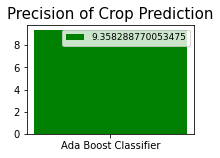

In [13]:
DT=precision.mean() *100
def graph():
    data=[DT]
    alg="Ada Boost Classifier"
    plt.figure(figsize=(3,2))
    b=plt.bar(alg,data,color=("green"))
    plt.title("Precision of Crop Prediction",fontsize=15)
    plt.legend(b,data,fontsize=9)
graph()

In [14]:
#Getting Recall
recall = recall_score(y_test,predicted_cbc,average='weighted') # recall: tp / (tp + fn)
print('Recall of Ada Boost Classifier is: ',recall*100)

Recall of Ada Boost Classifier is:  18.181818181818183


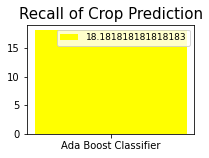

In [15]:
DT=recall.mean() *100
def graph():
    data=[DT]
    alg="Ada Boost Classifier"
    plt.figure(figsize=(3,2))
    b=plt.bar(alg,data,color=("yellow"))
    plt.title("Recall of Crop Prediction",fontsize=15)
    plt.legend(b,data,fontsize=9)
graph()

In [16]:
#Getting F1 Score
f1 = f1_score(y_test,predicted_cbc,average='weighted') # f1: 2 tp / (2 tp + fp + fn)
print('F1 Score of Ada Boost Classifier is: ',f1*100)

F1 Score of Ada Boost Classifier is:  11.11111111111111


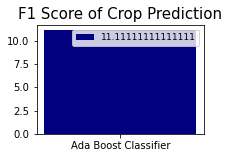

In [17]:
DT=f1.mean() *100
def graph():
    data=[DT]
    alg="Ada Boost Classifier"
    plt.figure(figsize=(3,2))
    b=plt.bar(alg,data,color=("#000080"))
    plt.title("F1 Score of Crop Prediction",fontsize=15)
    plt.legend(b,data,fontsize=9)
graph()

In [18]:
#Classification Report
cr = classification_report(y_test,predicted_cbc)
print('Classification report\n',cr)

Classification report
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.06      1.00      0.11        30
           2       0.00      0.00      0.00        30
           3       0.00      0.00      0.00        30
           4       0.00      0.00      0.00        30
           5       0.00      0.00      0.00        30
           6       0.00      0.00      0.00        30
           7       0.50      1.00      0.67        30
           8       0.00      0.00      0.00        30
           9       0.50      1.00      0.67        30
          10       0.00      0.00      0.00        30
          11       0.00      0.00      0.00        30
          12       0.00      0.00      0.00        30
          13       0.00      0.00      0.00        30
          14       0.00      0.00      0.00        30
          15       1.00      1.00      1.00        30
          16       0.00      0.00      0.00        30
    

In [19]:
#Confusion Matrix
cm = confusion_matrix(y_test,predicted_cbc)
print('Confusion matrix\n',cm)

Confusion matrix
 [[ 0  0  0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 30  0  0  0

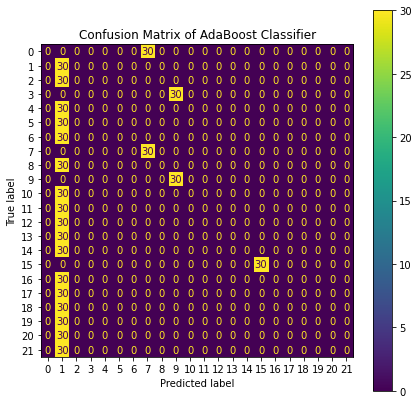

In [20]:
fig, ax = plt.subplots(figsize=(7,7))
plot_confusion_matrix(cbc, X_test, y_test, ax=ax)
plt.title('Confusion Matrix of AdaBoost Classifier')
plt.show()

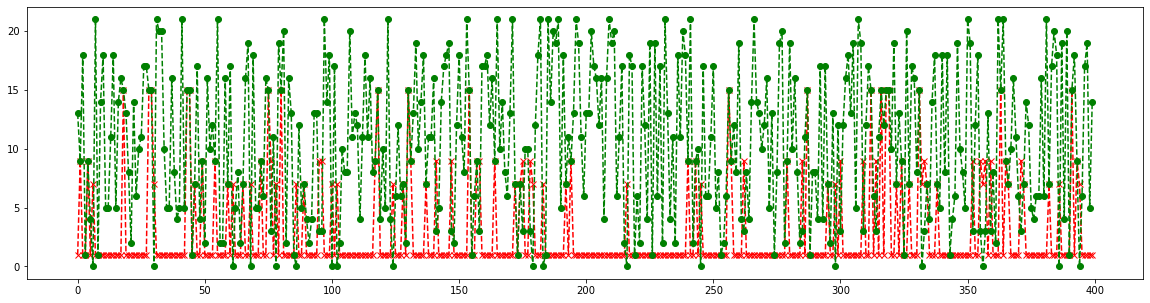

In [21]:
DF = p.DataFrame()
DF["y_test"] = y_test
DF["predicted"] = predicted_cbc
DF.reset_index(inplace=True)
plt.figure(figsize=(20, 5))
plt.plot(DF["predicted"][:400], marker='x', linestyle='dashed', color='red')
plt.plot(DF["y_test"][:400],  marker='o', linestyle='dashed', color='green')
plt.show()

In [22]:
#Saving Model
import joblib
joblib.dump(cbc,'cbc.pkl')

['cbc.pkl']